In [43]:
import json
from wordcloud import WordCloud

In [3]:
with open('../data/processed/wea_freq_counts.json', 'r', encoding='utf8') as f:
    common_wea = json.load(f)

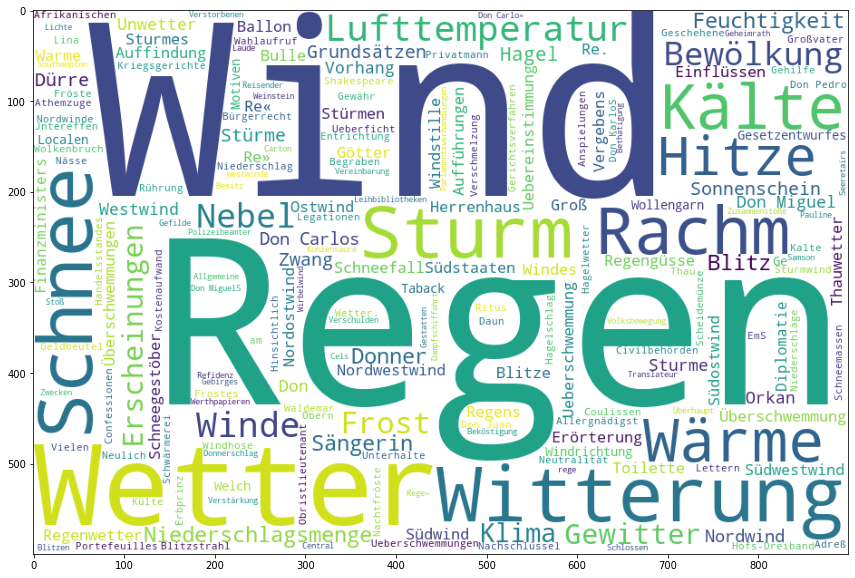

In [6]:
common_wea_dict = {entity: freq for (entity, freq) in common_wea}

wc = WordCloud(background_color='white', width=900, height=600)
wc.generate_from_frequencies(common_wea_dict)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.show()

## PCA

In [44]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [8]:
model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format('../data/models/word2vec_251021/w2v_model.txt')

In [62]:
df_data = {word: list(model[word]) for (word, freq) in common_wea[:100] if model.has_index_for(word)}
df = pd.DataFrame(df_data).transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Wind,3.997121,-1.997144,-0.896162,-1.015114,-0.644477,5.687706,-0.398044,-4.558488,-2.631009,0.409658,...,-2.136814,0.583438,3.231198,1.095965,-1.395962,1.187891,0.579628,2.233373,0.842518,1.585546
Regen,4.597841,-1.278705,-0.924405,-0.310730,4.019860,6.215589,0.146798,-1.136845,1.547163,-0.099335,...,-1.369600,-0.462511,1.295471,-0.558615,-2.030243,1.398353,-1.667691,-1.582838,-2.764452,-0.416062
Wetter,1.378204,-2.707503,-2.039176,1.217988,2.243737,7.249822,0.605895,-0.760818,1.997465,1.639767,...,-1.648705,0.733798,1.211946,4.739862,-3.160194,3.041113,-2.772848,-0.826249,0.374688,-1.111655
Witterung,-0.005538,-7.517947,-0.256603,-0.812336,3.149959,6.066840,-0.382613,-0.186831,2.737664,0.334570,...,-2.412435,-0.453090,0.055757,1.896720,-4.634286,2.564435,-0.422497,1.706759,-0.234471,0.613567
Schnee,3.939676,-1.105344,0.347245,-0.435409,3.114347,6.202371,-0.316959,-0.076473,0.962735,-2.151477,...,-2.628811,-0.392534,3.291287,-0.900989,-1.600252,-0.184403,-0.208574,-0.483410,-4.225474,-1.926019


In [63]:
# from: https://www.youtube.com/watch?v=Lsue2gEM9D0

pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)

In [64]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

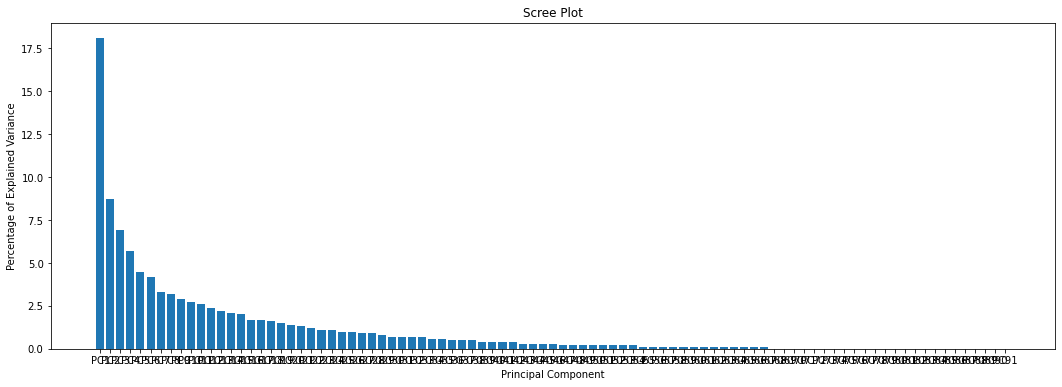

In [65]:
plt.figure(figsize=(18,6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

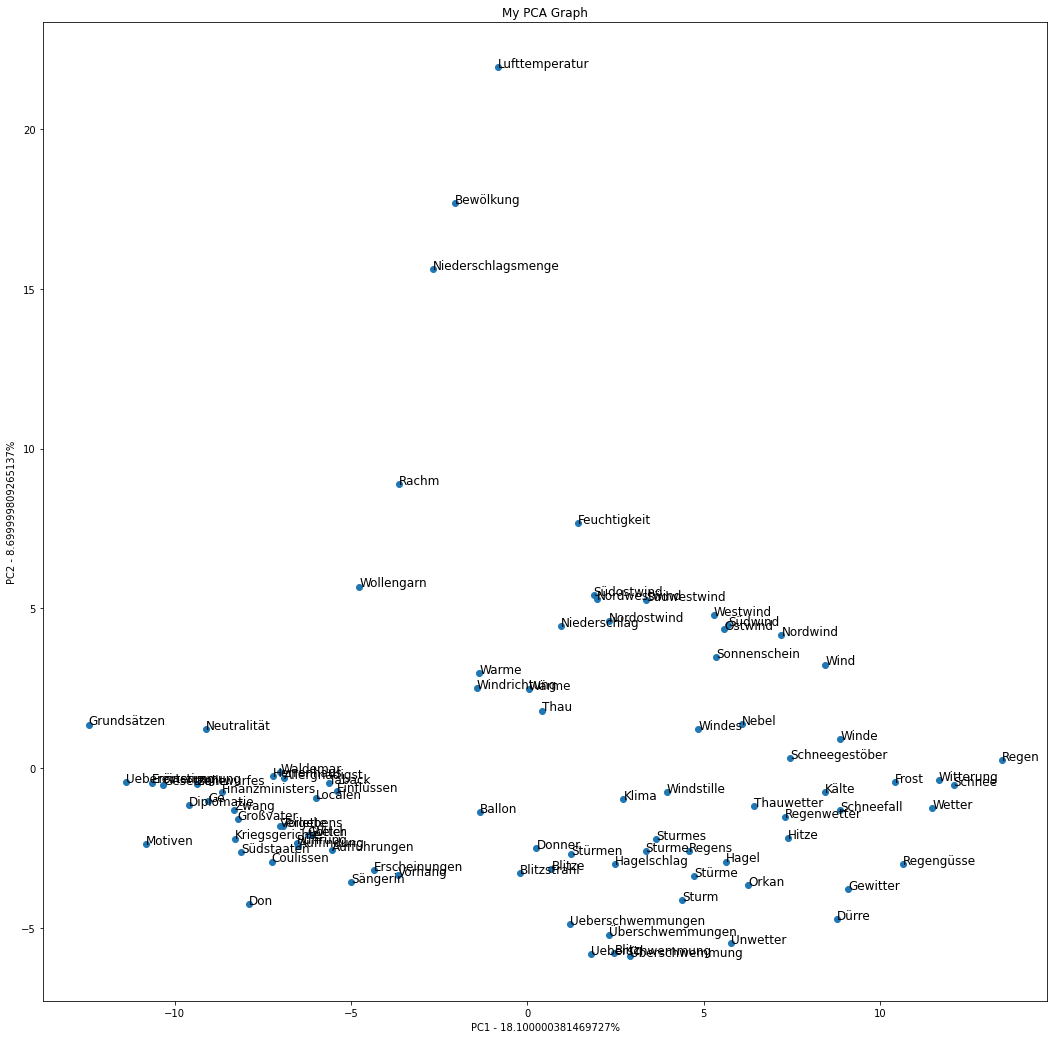

In [68]:
pca_df = pd.DataFrame(data=pca_data, index=df.index, columns=labels)

plt.figure(figsize=(18,18))

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]), size=12)
    
plt.show()

## Check if similar vectors are captured

In [77]:
def check_similar_vectors_presence(common_wea, model, top_n):

    results = {}
    entities = [word for (word,freq) in common_wea]
    
    for word in entities:
        if model.has_index_for(word):
            results[word] = [similar[0] for similar in model.most_similar(word, topn=top_n)
                             if similar[0] in entities]
        
    return results
    
check_similar_vectors_presence(common_wea[:1000], model, 20)

{'Wind': ['Winde',
  'Windes',
  'Regen',
  'Nordwind',
  'Nordostwinde',
  'Nordwinde',
  'WindeS',
  'Westwinde'],
 'Regen': ['Schnee',
  'Regenwetter',
  'Schneegestöber',
  'Frost',
  'Schnee-',
  'Regengüsse',
  'Gewitter',
  'Nachtfröste'],
 'Wetter': ['Witterung', 'Regenwetter', 'Winde', 'Regen'],
 'Witterung': ['Wetter', 'Regenwetter', 'Nachtfröste', 'Regen', 'Nordwinde'],
 'Schnee': ['Regen',
  'Schnee-',
  'Schneegestöber',
  'Frost',
  'Schneefall',
  'Schneemassen',
  'Regenwetter',
  'Nebel',
  'Thauwetter'],
 'Sturm': ['Sturme',
  'Orkan',
  'Sturmes',
  'Sturmwind',
  'Stürme',
  'Wirbelwind',
  'Sturms',
  'Stürmen'],
 'Rachm': [],
 'Kälte': ['Kalte',
  'Frost',
  'Hitze',
  'Külte',
  'Fröste',
  'Regenwetter',
  'Thauwetter',
  'Nachtfröste',
  'Schneefall',
  'Froste',
  'Nordwinde',
  'Schneegestöber'],
 'Wärme': ['Warme', 'Kälte'],
 'Hitze': ['Kälte',
  'Kalte',
  'Trockenheit',
  'Frost',
  'Külte',
  'Regenwetter',
  'Nässe',
  'Dürre',
  'Regen',
  'Regengüsse',

In [71]:
model.most_similar('Sturm', topn=20)

[('Sturme', 0.8511337637901306),
 ('Stnrm', 0.7905899286270142),
 ('Orkan', 0.7448872923851013),
 ('Nordweststurm', 0.7183792591094971),
 ('Schneesturm', 0.6962900161743164),
 ('Srurm', 0.6929555535316467),
 ('Sturmes', 0.6910862326622009),
 ('Windstoß', 0.6822366714477539),
 ('Slurm', 0.6748476624488831),
 ('Sturmwind', 0.6741207838058472),
 ('Ungewitter', 0.671855092048645),
 ('Stürme', 0.6692672371864319),
 ('Wirbelwind', 0.6641231775283813),
 ('Windstößen', 0.6616709232330322),
 ('Sturms', 0.661562979221344),
 ('Orcan', 0.6597139835357666),
 ('Platzregen', 0.6556122899055481),
 ('SturmeS', 0.653791069984436),
 ('Gewitters', 0.6499243974685669),
 ('Stürmen', 0.6494671702384949)]

In [78]:
common_wea[:100]

[['Wind', 9437],
 ['Regen', 8610],
 ['Wetter', 7725],
 ['Witterung', 7067],
 ['Schnee', 6849],
 ['Sturm', 6137],
 ['Rachm', 4990],
 ['Kälte', 4643],
 ['Wärme', 4272],
 ['Hitze', 3314],
 ['Lufttemperatur', 3156],
 ['Winde', 2860],
 ['Nebel', 2670],
 ['Bewölkung', 2560],
 ['Frost', 2189],
 ['Gewitter', 1952],
 ['Erscheinungen', 1915],
 ['Klima', 1691],
 ['Niederschlagsmenge', 1672],
 ['Blitz', 1633],
 ['Donner', 1630],
 ['Feuchtigkeit', 1613],
 ['Sängerin', 1559],
 ['Hagel', 1220],
 ['Stürme', 1091],
 ['Sonnenschein', 1056],
 ['Grundsätzen', 1033],
 ['Dürre', 983],
 ['Zwang', 976],
 ['Don Carlos', 856],
 ['Nordwind', 850],
 ['Don', 795],
 ['Vorhang', 787],
 ['Orkan', 757],
 ['Unwetter', 739],
 ['Sturme', 716],
 ['Westwind', 712],
 ['Don Miguel', 706],
 ['Herrenhaus', 666],
 ['Schneefall', 656],
 ['Südwind', 643],
 ['Einflüssen', 631],
 ['Erörterung', 622],
 ['Regengüsse', 617],
 ['Ostwind', 601],
 ['Überschwemmung', 570],
 ['Sturmes', 559],
 ['Stürmen', 545],
 ['Bulle', 527],
 ['Ueberein